In [1]:
# import necessary libs

import numpy as np
import pandas as pd

import datetime
import sweetviz as sv
import sys
from matplotlib import pyplot as plt

In [2]:
#read dataset
emp = pd.read_csv('/home/viktor/Documentos/DED/vendedor.csv', engine='python', sep=',')
sales_tran = pd.read_csv('/home/viktor/Documentos/DED/vendas_tran.csv', engine='python', sep=';')

In [3]:
# show table from emp
emp.head()

SalesPersonId SalesPersonName SalesPersonLastName   Region
0           3029            Anna            Andreadi     West
1           3030           Chuck               Magee     East
2           3031           Kelly            Williams  Central
3           3032       Cassandra             Brandow    South

In [4]:
# show table from sales
sales_tran.head()

RowID         OrderID   OrderDate    ShipDate        ShipMode CustomerID  \
0   9261  CA-2017-167976  11/11/2017  11/14/2017    Second Class   JL-15505   
1   6990  CA-2017-165099  12/11/2017  12/13/2017     First Class   DK-13375   
2    201  CA-2017-105074   6/24/2017   6/29/2017  Standard Class   MB-17305   
3   3201  CA-2014-164224   5/18/2014   5/20/2014    Second Class   TT-21070   
4   3202  CA-2014-164224   5/18/2014   5/20/2014    Second Class   TT-21070   

      CustomerName   Segment        Country      City  ...     PostalCode  \
0  Jeremy/Lonsdale  Consumer  United States  Aberdeen  ...  57401 Central   
1      Dennis/Kane  Consumer  United States   Abilene  ...  79605 Central   
2  Maria/Bertelson  Consumer  United States     Akron  ...     44312 East   
3      Ted/Trevino  Consumer  United States     Akron  ...     44312 East   
4      Ted/Trevino  Consumer  United States     Akron  ...     44312 East   

         ProductID         Category  SubCategory  \
0  OFF-SU-10004661  Office Supplies     Supplies   
1  OFF-AP-10001634  Office Supplies   Appliances   
2  OFF-PA-10002666  Office Supplies        Paper   
3  FUR-FU-10000308        Furniture  Furnishings   
4  OFF-PA-10001526  Office Supplies        Paper   

                                         ProductName   Sales Quantity  \
0                      Acme Titanium Bonded Scissors    25,5        3   
1       Hoover Commercial Lightweight Upright Vacuum    1,39        2   
2  Southworth 25% Cotton Linen-Finish Paper & Env...   21,74        3   
3           Deflect-o Glass Clear Studded Chair Mats  149,23        3   
4                                         Xerox 1949   15,94        4   

   Discount Profit SalesPersonId  
0         0   6,63          3029  
1       0,8  -3,76          3032  
2       0,2    6,8          3029  
3       0,2   3,73          3031  
4       0,2   5,78          3031  

[5 rows x 21 columns]

In [5]:
# join between the two datasets
sales_emp = pd.merge(emp, sales_tran, how = 'right', on='SalesPersonId')

In [6]:
# check data type
sales_tran.info()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RowID          9994 non-null   int64 
 1   OrderID        9994 non-null   object
 2   OrderDate      9994 non-null   object
 3   ShipDate       9994 non-null   object
 4   ShipMode       9994 non-null   object
 5   CustomerID     9994 non-null   object
 6   CustomerName   9994 non-null   object
 7   Segment        9994 non-null   object
 8   Country        9994 non-null   object
 9   City           9994 non-null   object
 10  State          9994 non-null   object
 11  PostalCode     9994 non-null   object
 12  ProductID      9994 non-null   object
 13  Category       9994 non-null   object
 14  SubCategory    9994 non-null   object
 15  ProductName    9994 non-null   object
 16  Sales          9994 non-null   object
 17  Quantity       9994 non-null   int64 
 18  Discount       9994 non-null

In [7]:
## converting functions

# replacing , for . to avoiding convertion errors
sales_emp['Sales'] = sales_emp['Sales'].str.replace(',', '.')
sales_emp['Discount'] = sales_emp['Discount'].str.replace(',', '.')
sales_emp['Profit'] = sales_emp['Profit'].str.replace(',', '.')

# converting to numeric values
sales_emp[['Sales', 'Discount', 'Profit']] = sales_emp[['Sales', 'Discount', 'Profit']].astype(float)
sales_emp['Quantity'] = sales_emp['Quantity'].astype(int)

# converting do date as a appropriate format
sales_emp['OrderDate'] = pd.to_datetime(sales_emp['OrderDate'].str.strip(), format='%m/%d/%Y')
sales_emp['ShipDate'] = pd.to_datetime(sales_emp['ShipDate'].str.strip(), format='%m/%d/%Y')

In [8]:
# check if the columns were converted
sales_emp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SalesPersonId        9994 non-null   int64         
 1   SalesPersonName      9994 non-null   object        
 2   SalesPersonLastName  9994 non-null   object        
 3   Region               9994 non-null   object        
 4   RowID                9994 non-null   int64         
 5   OrderID              9994 non-null   object        
 6   OrderDate            9994 non-null   datetime64[ns]
 7   ShipDate             9994 non-null   datetime64[ns]
 8   ShipMode             9994 non-null   object        
 9   CustomerID           9994 non-null   object        
 10  CustomerName         9994 non-null   object        
 11  Segment              9994 non-null   object        
 12  Country              9994 non-null   object        
 13  City                 9994 non-nul

                                             |          | [  0%]   00:00 -> (? left)


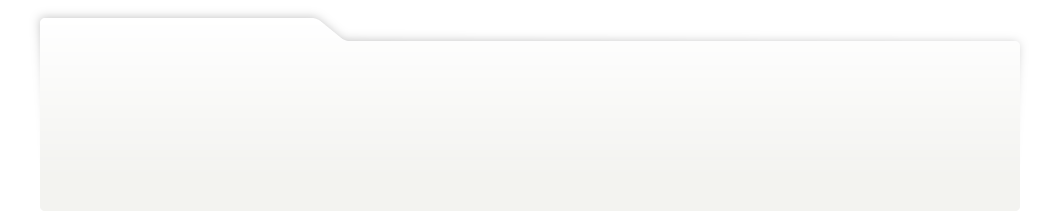
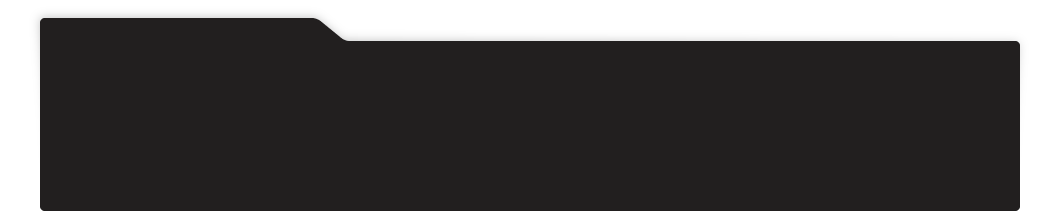
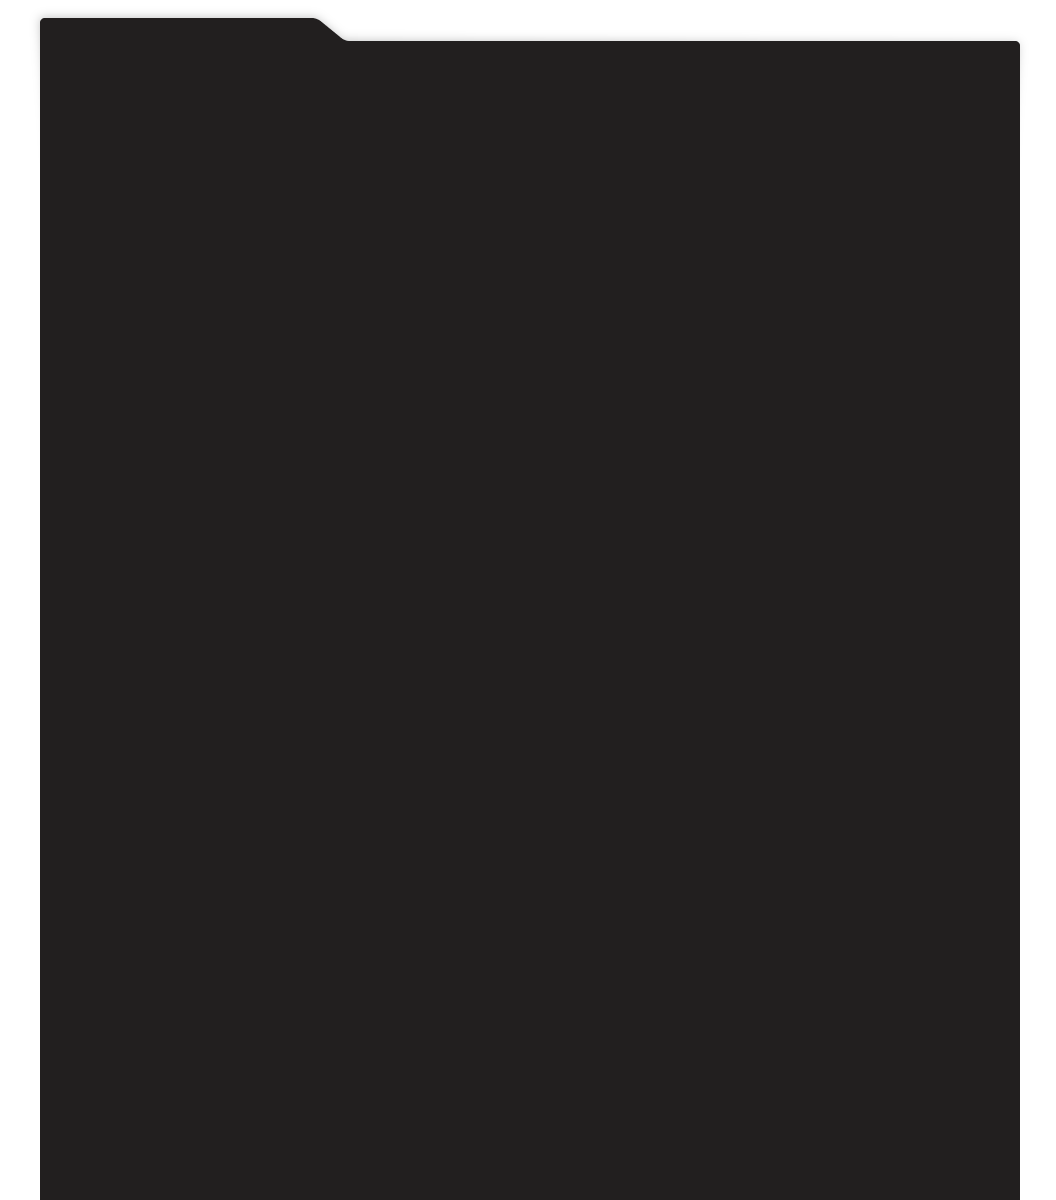
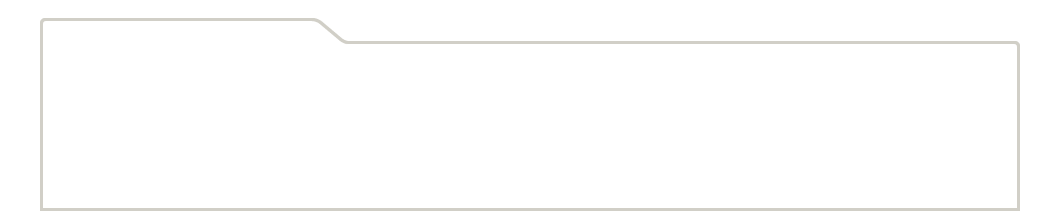
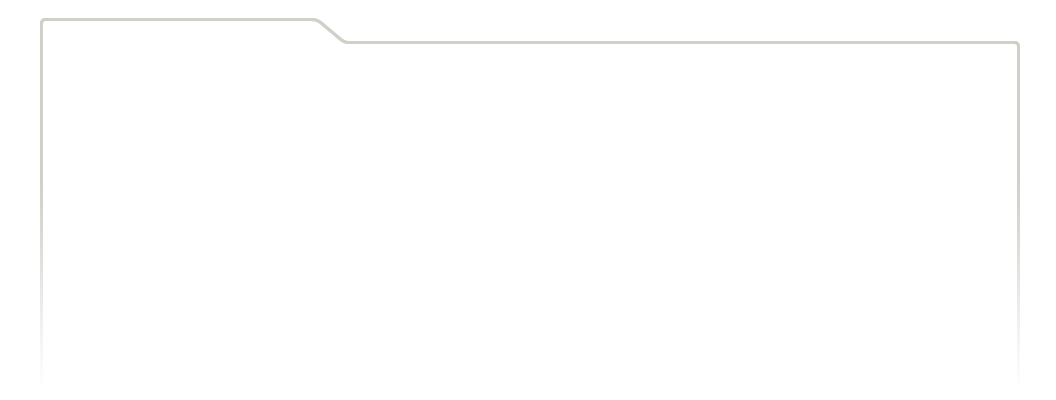
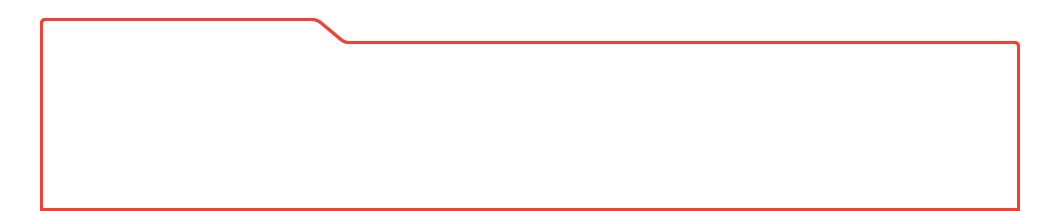
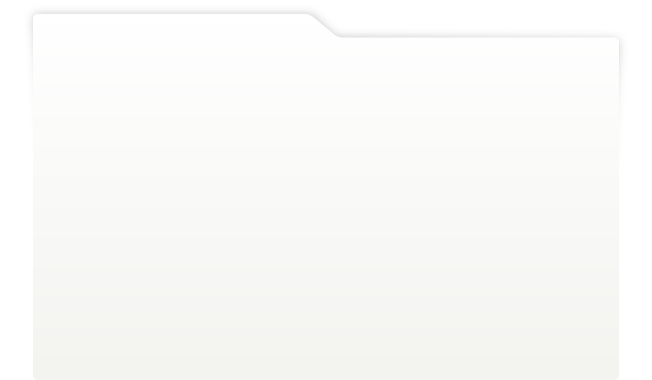
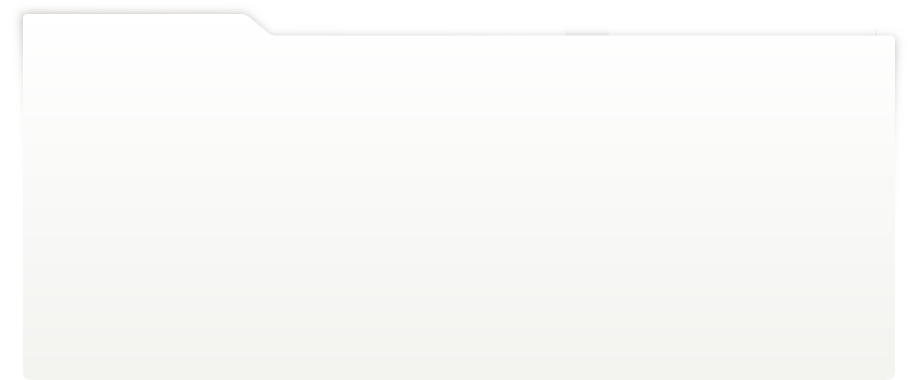
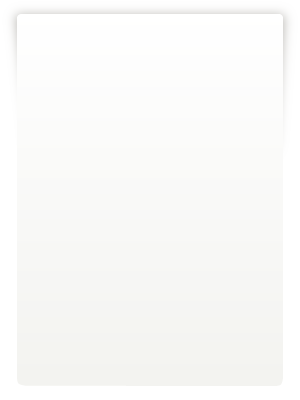
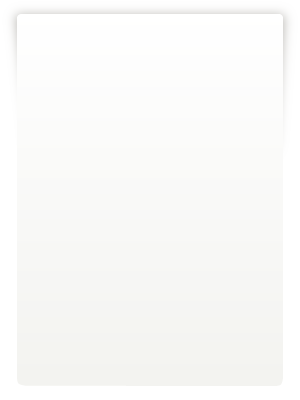
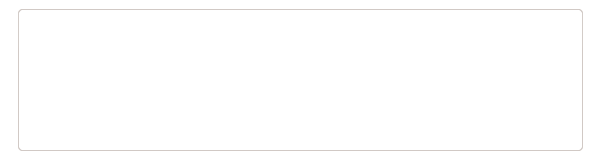
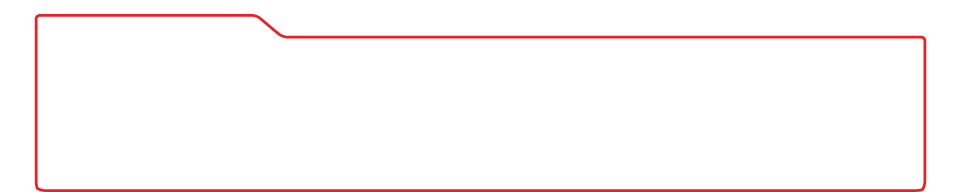
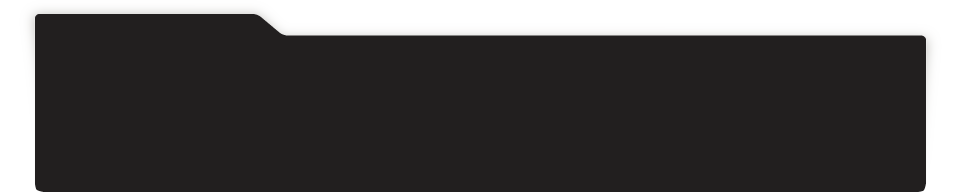
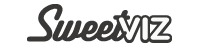
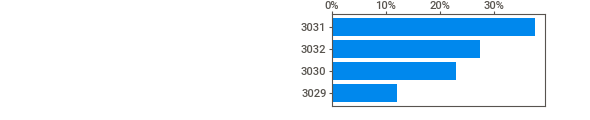
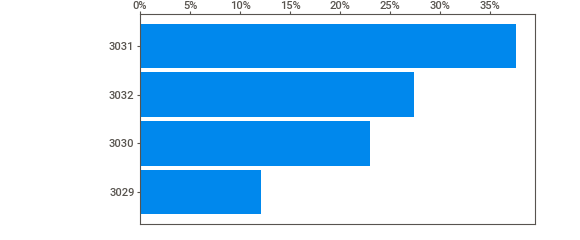
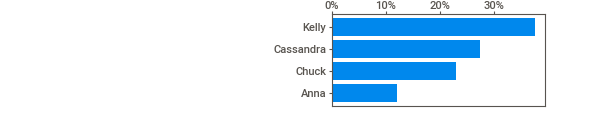
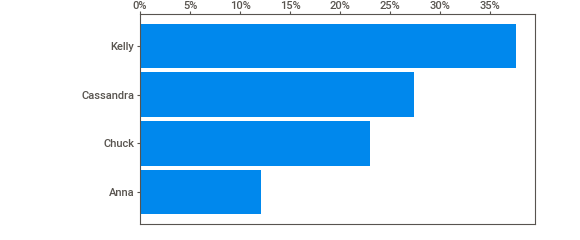
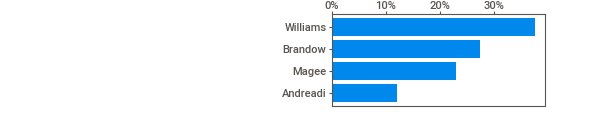
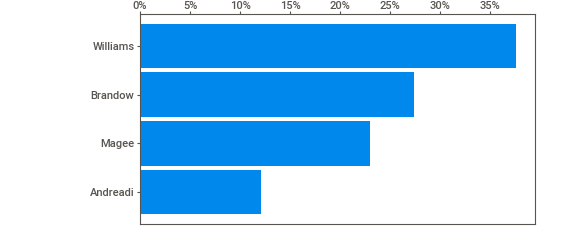
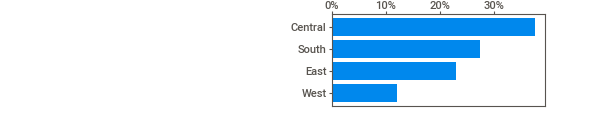
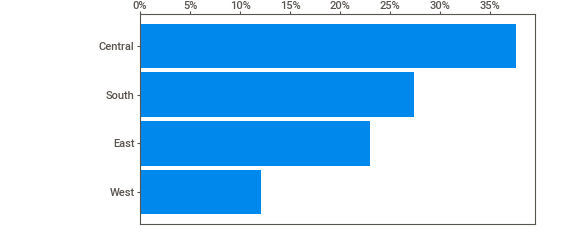
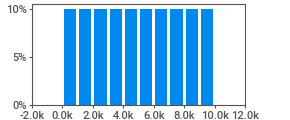
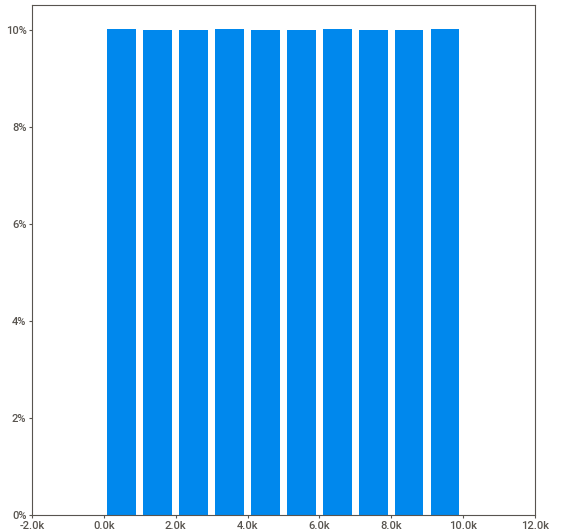
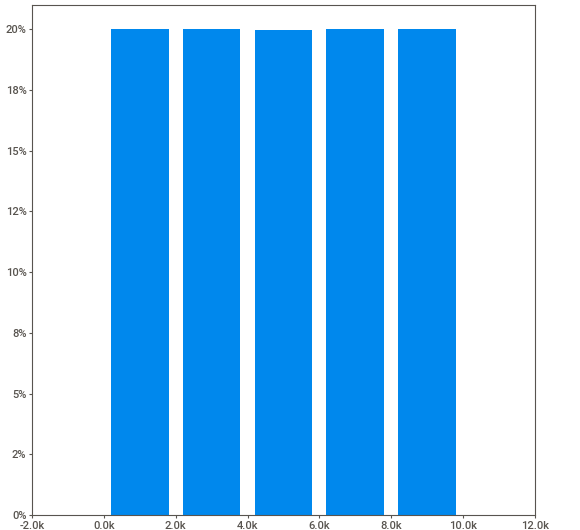
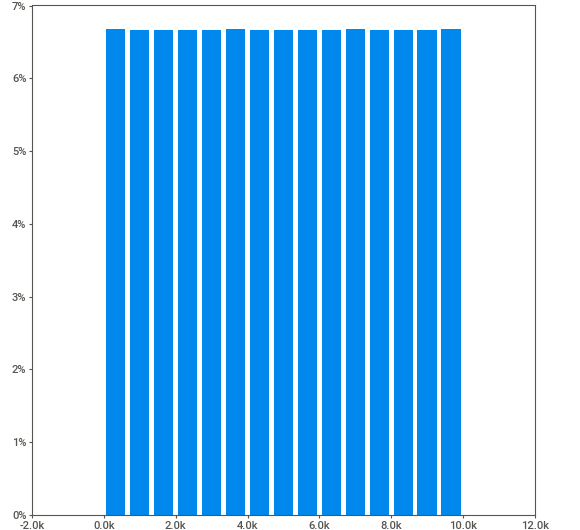
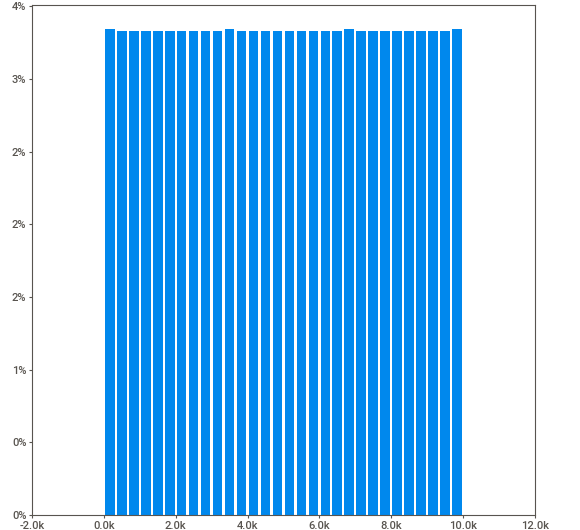
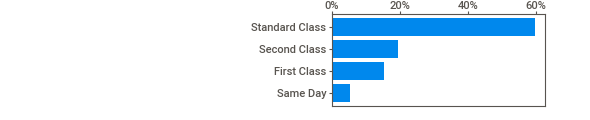
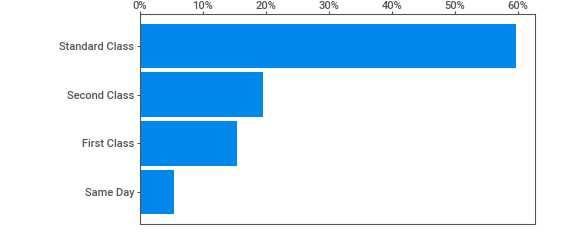
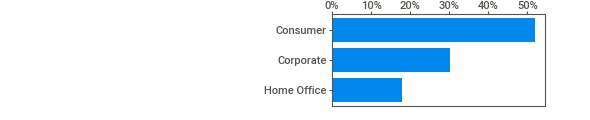
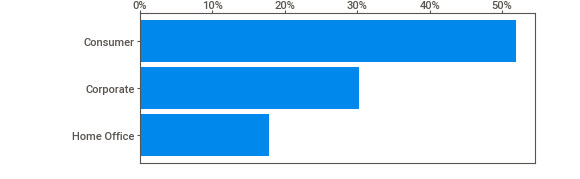
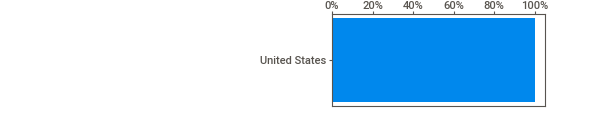
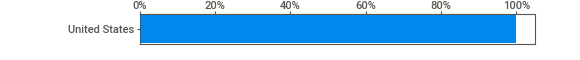
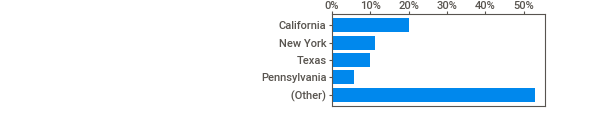
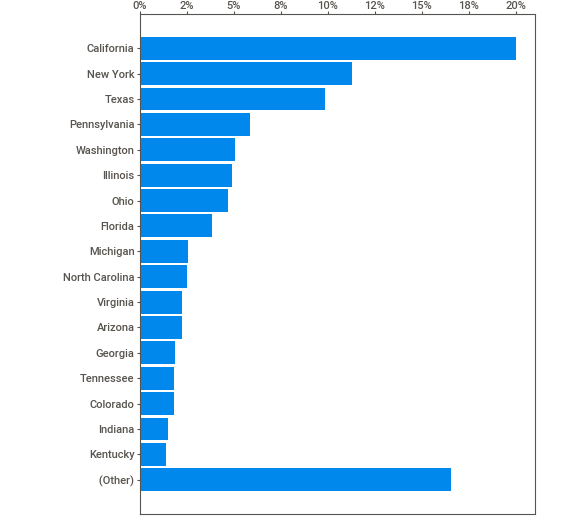
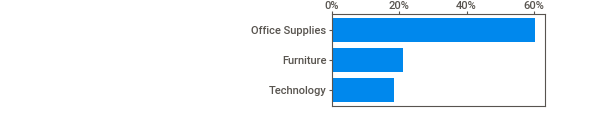
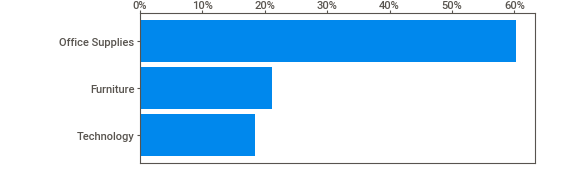
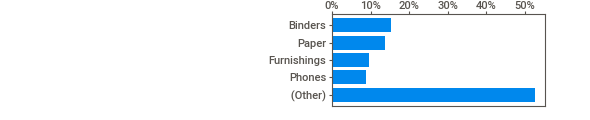
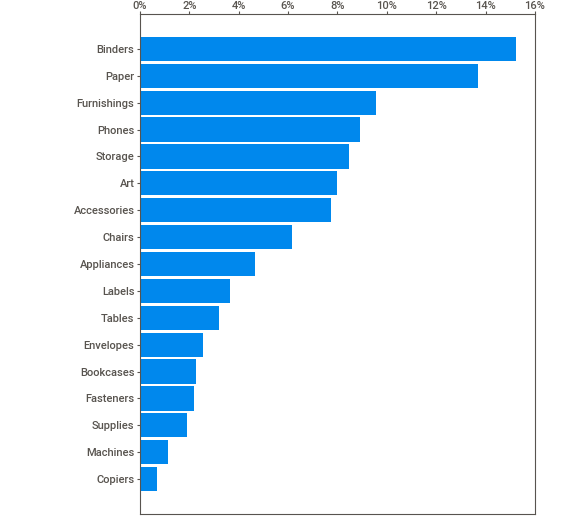
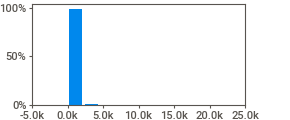
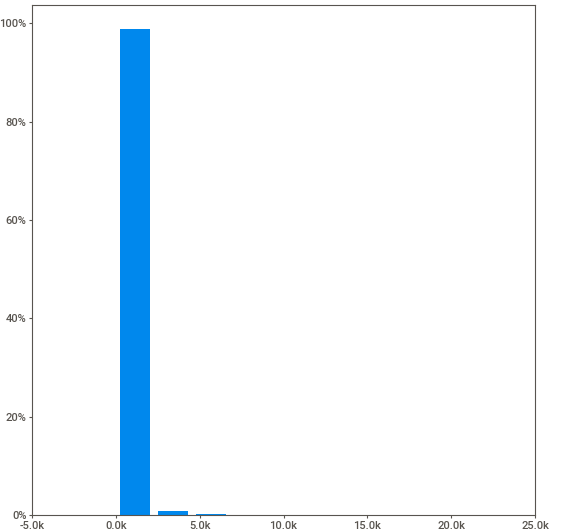
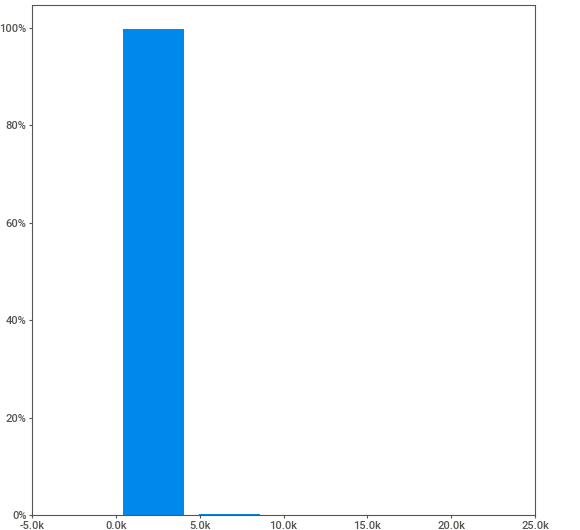
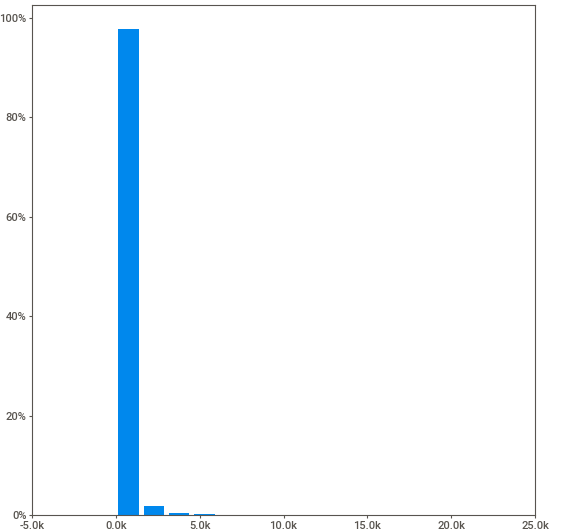
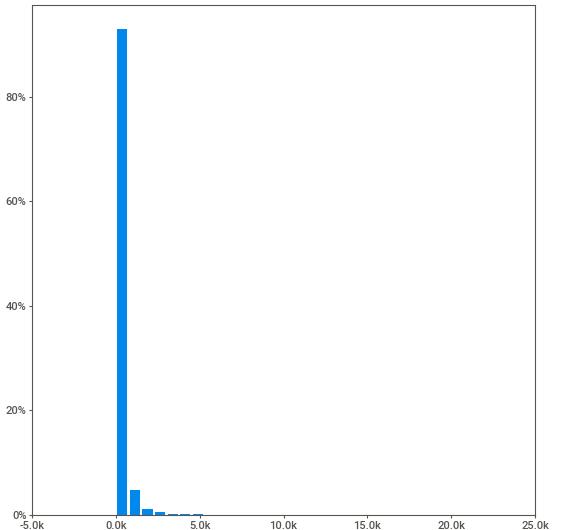
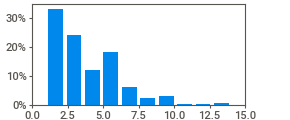
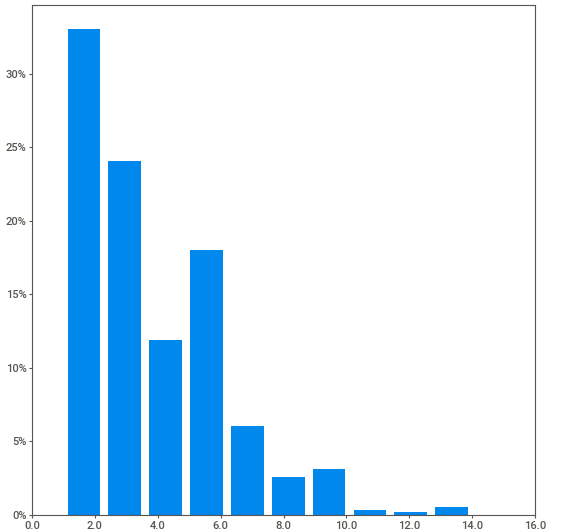
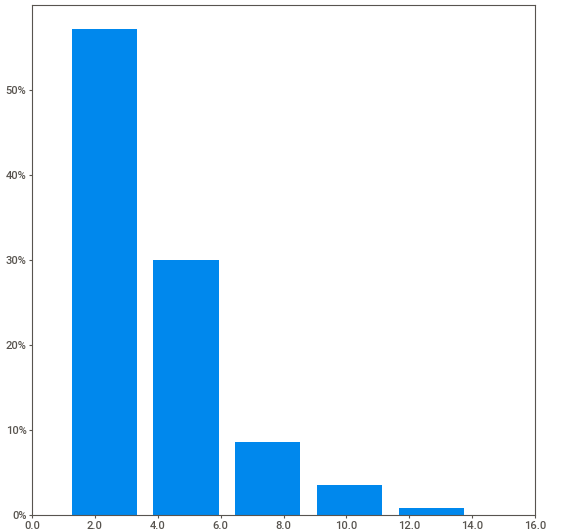
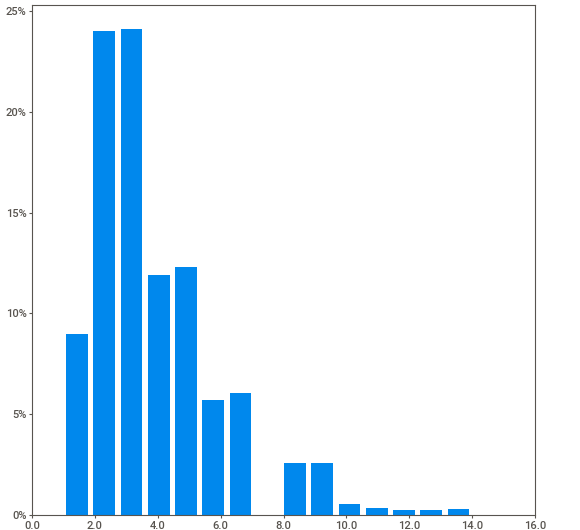
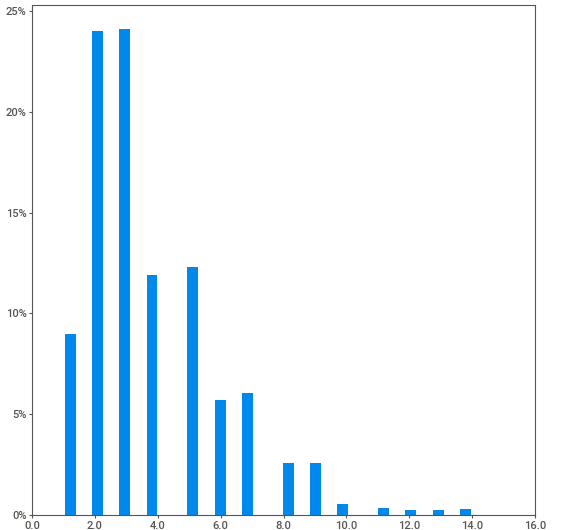
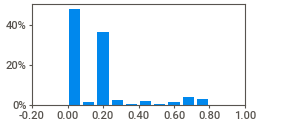
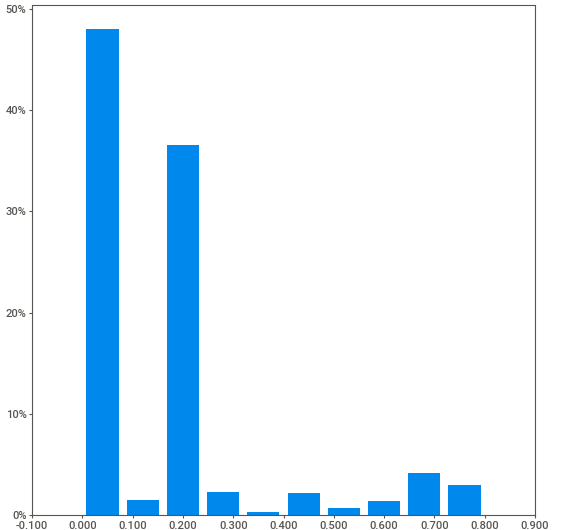
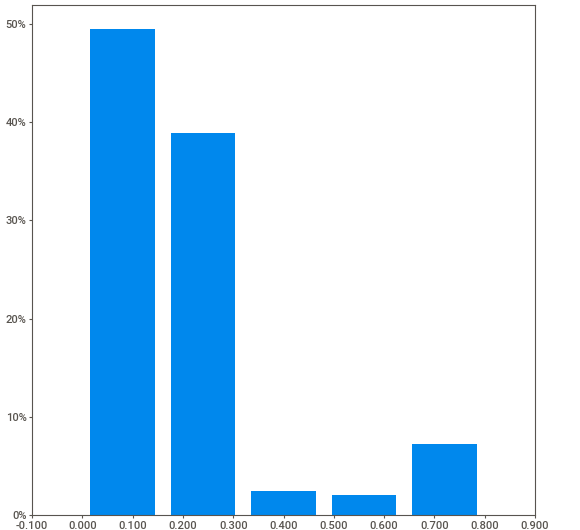
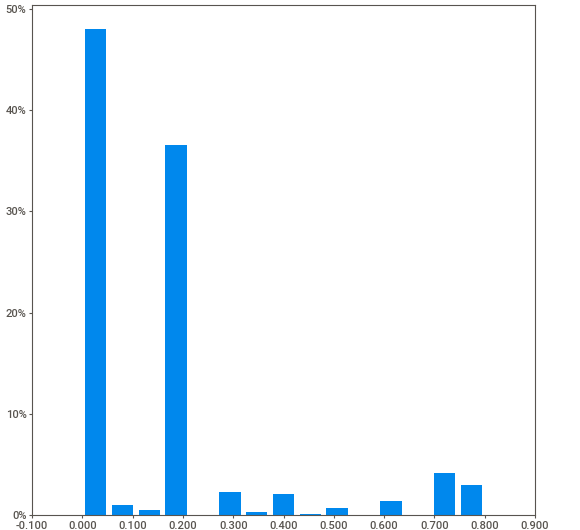
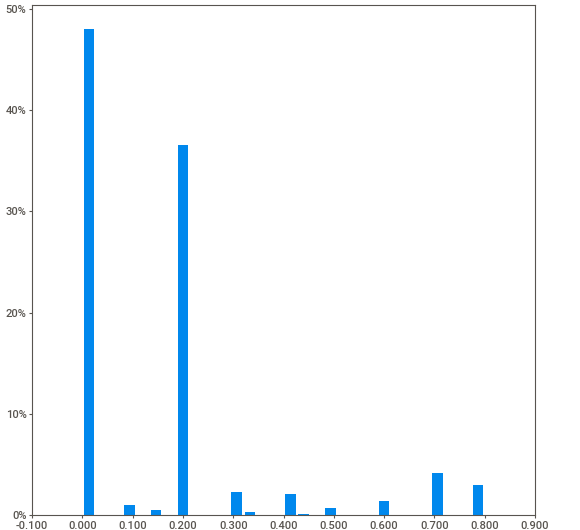
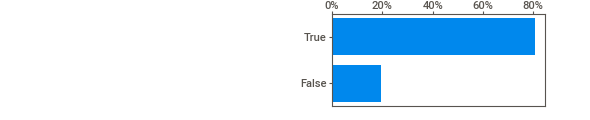
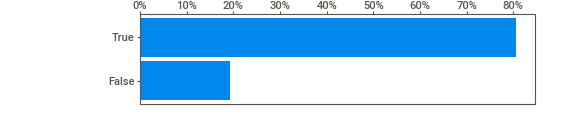
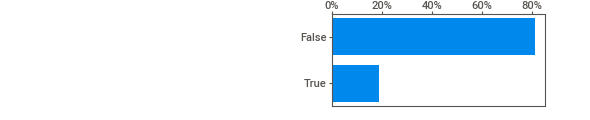
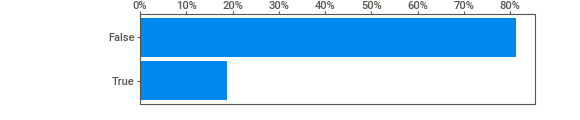
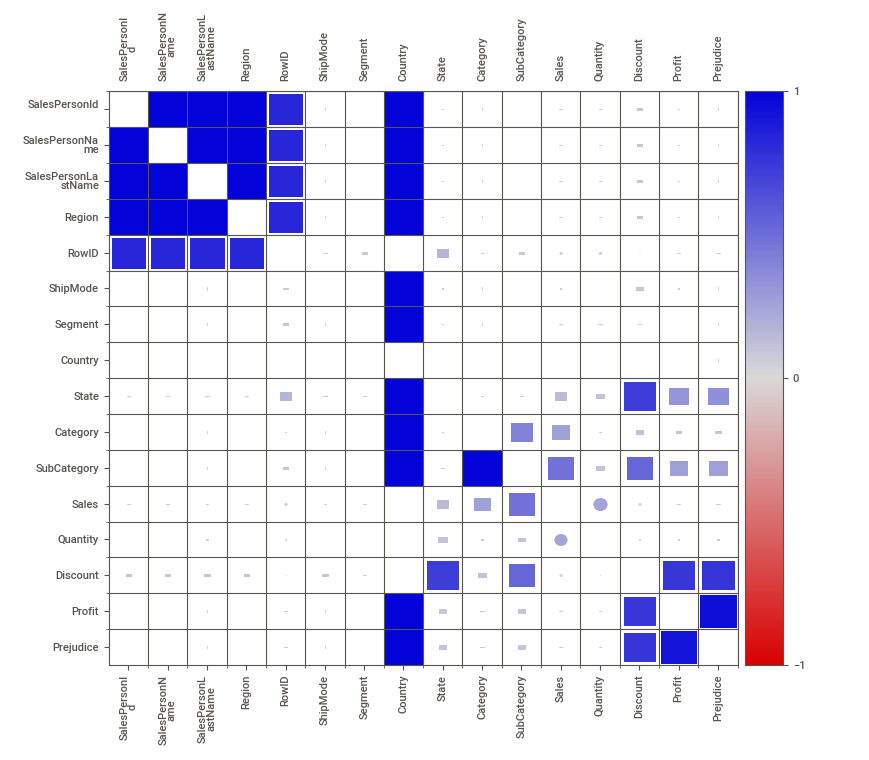
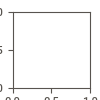

In [23]:
#create first report
report = sv.analyze(sales_emp)
report.show_notebook(layout='vertical', w=1000, h=600, scale=0.9)

## Since we've values lesser than 0 on Profit column, we can create a new column only for negative values called Prejudice.


In [14]:
# create a new empty column
sales_emp['Prejudice'] = pd.Series() 

# conditional to separate the values between two columns
sales_emp['Prejudice'] = (sales_emp['Profit'] < 0)
sales_emp['Profit'] = sales_emp['Profit'] > 0


/home/viktor/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [16]:
# check if the new Column has been created and populated as expected
sales_emp.isnull().sum()

SalesPersonId          0
SalesPersonName        0
SalesPersonLastName    0
Region                 0
RowID                  0
OrderID                0
OrderDate              0
ShipDate               0
ShipMode               0
CustomerID             0
CustomerName           0
Segment                0
Country                0
City                   0
State                  0
PostalCode             0
ProductID              0
Category               0
SubCategory            0
ProductName            0
Sales                  0
Quantity               0
Discount               0
Profit                 0
Prejudice              0
dtype: int64

In [17]:
# create report based on Sales feature
sales = sv.analyze(sales_emp, target_feat='Sales')

                                             |          | [  0%]   00:00 -> (? left)


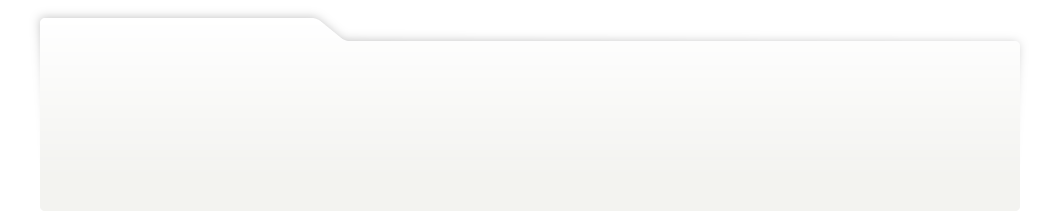
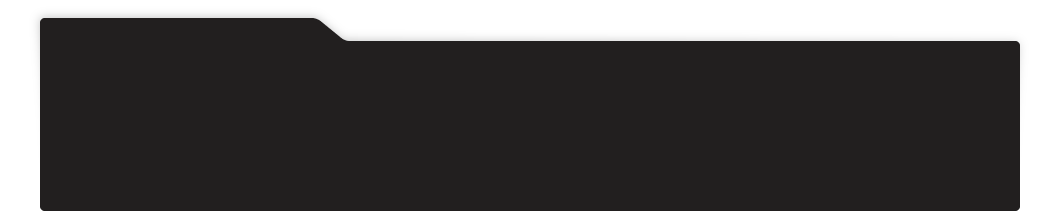
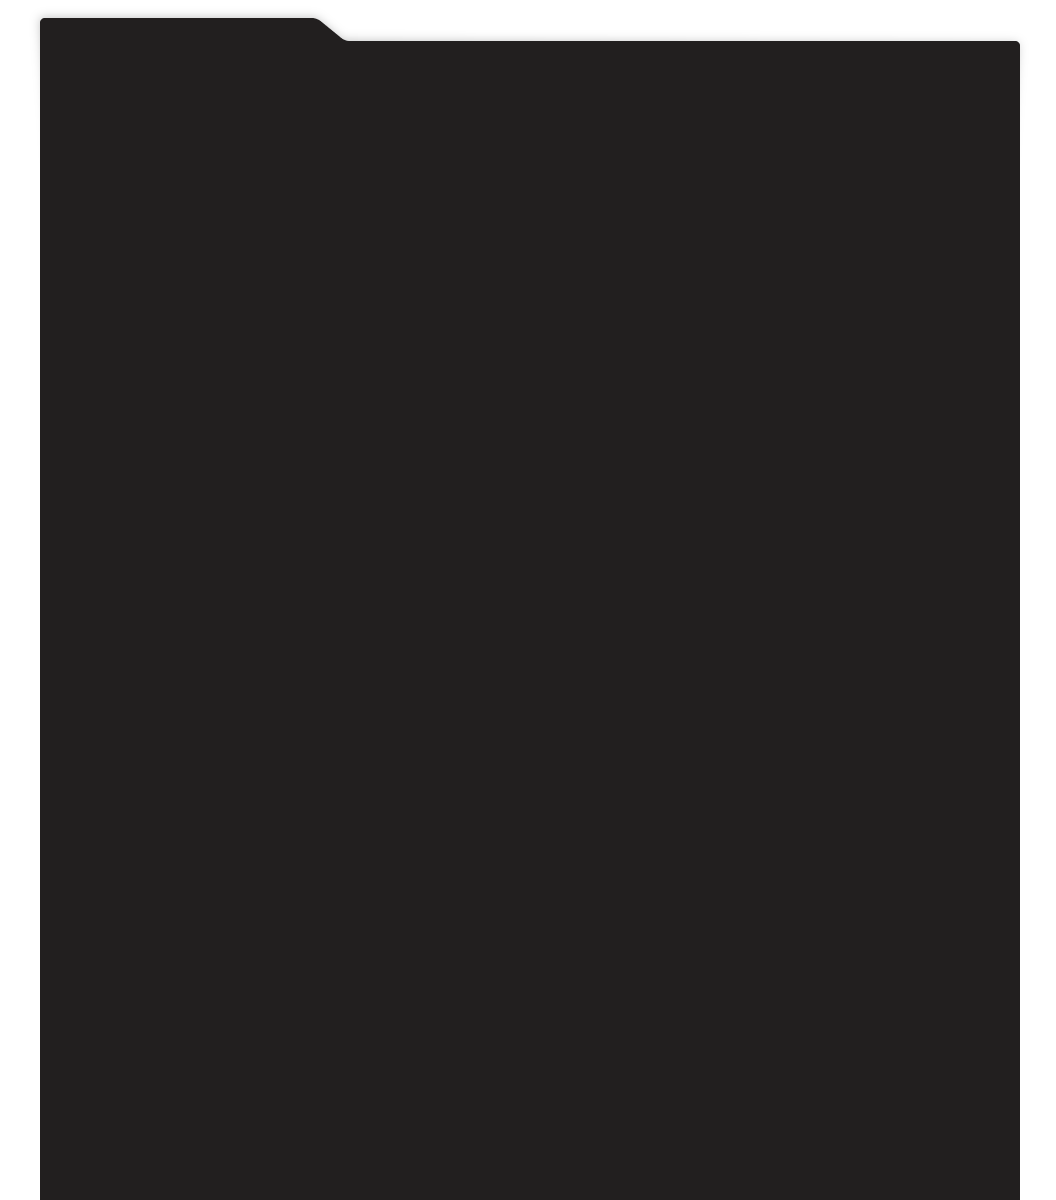
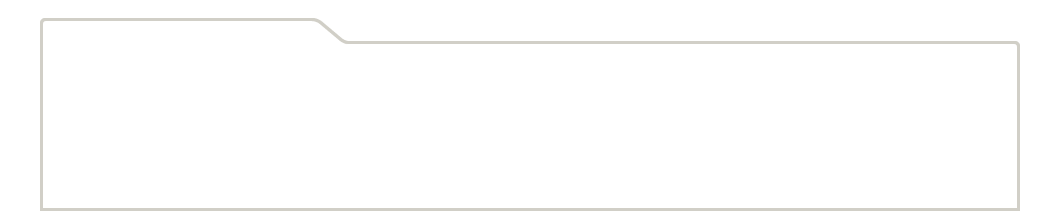
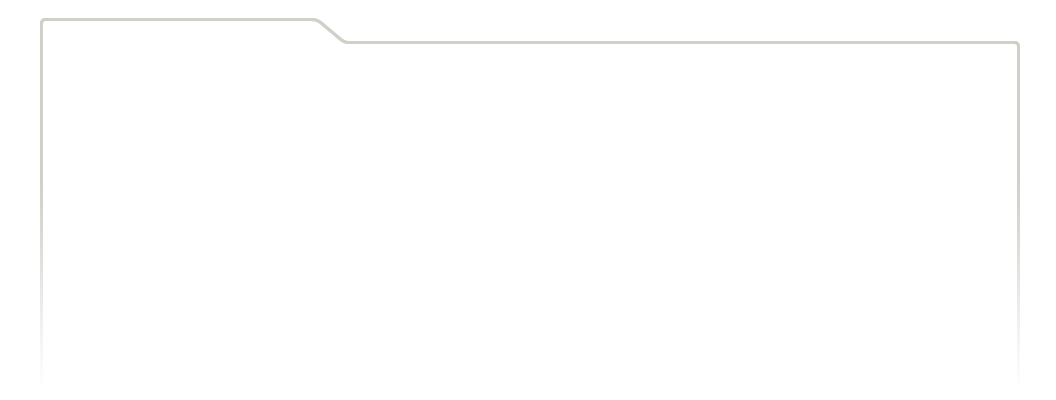
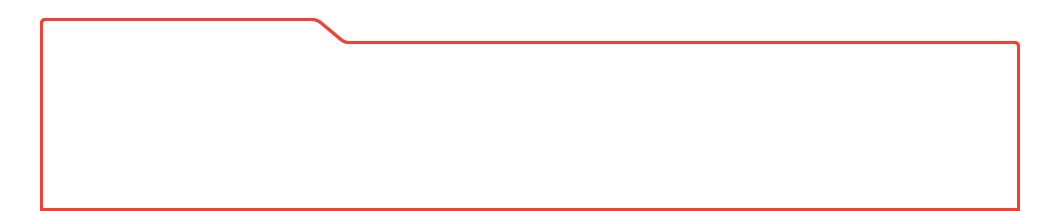
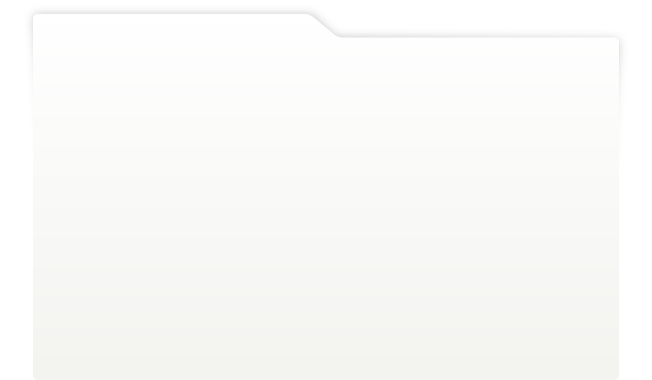
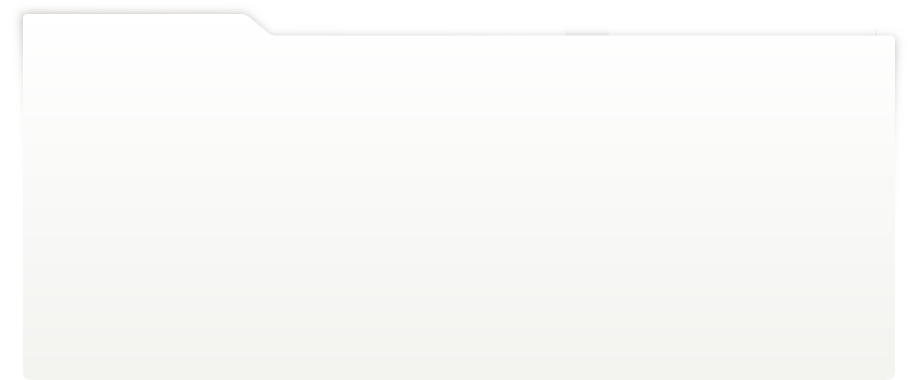
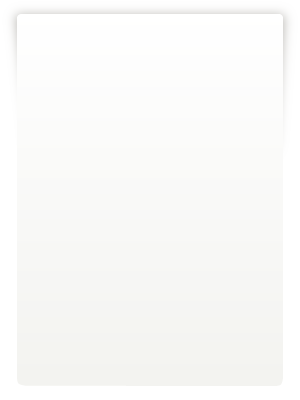
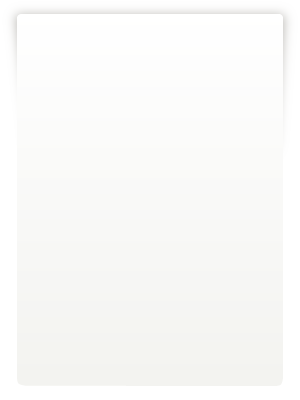
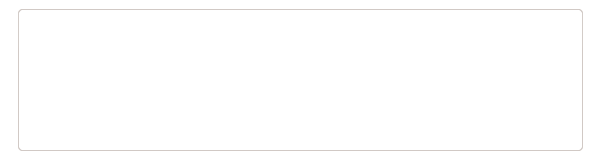
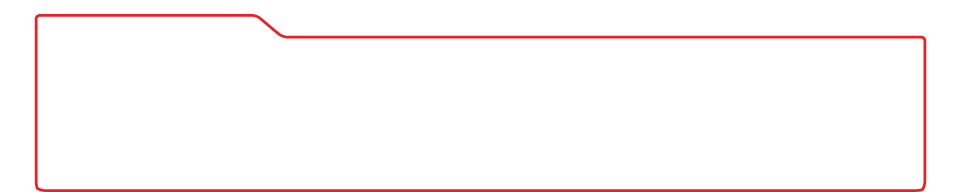
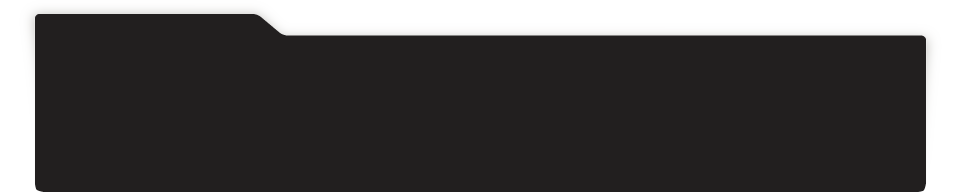
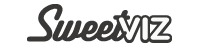
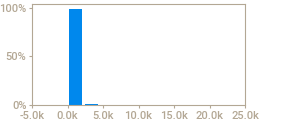
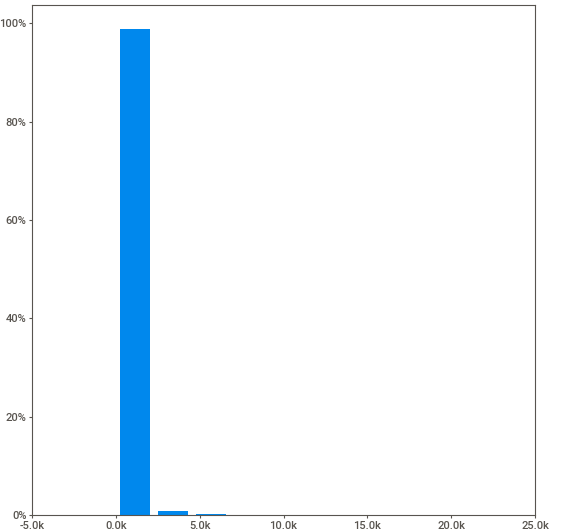
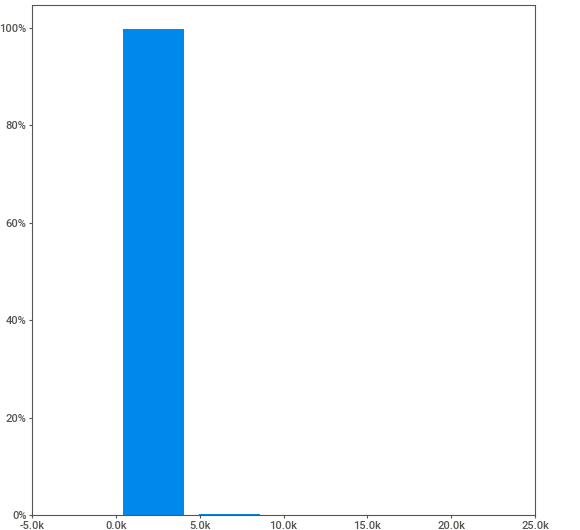
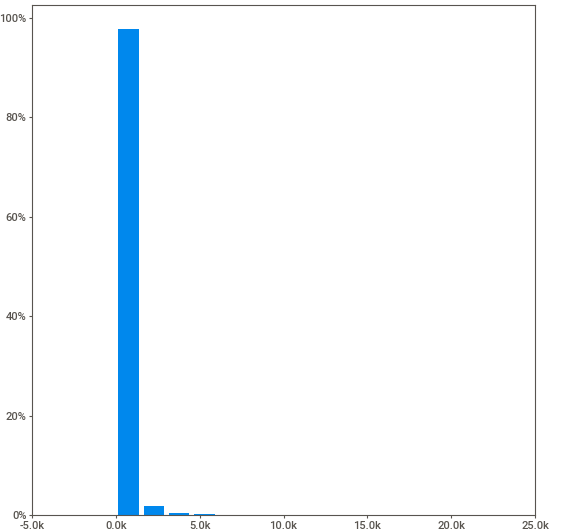
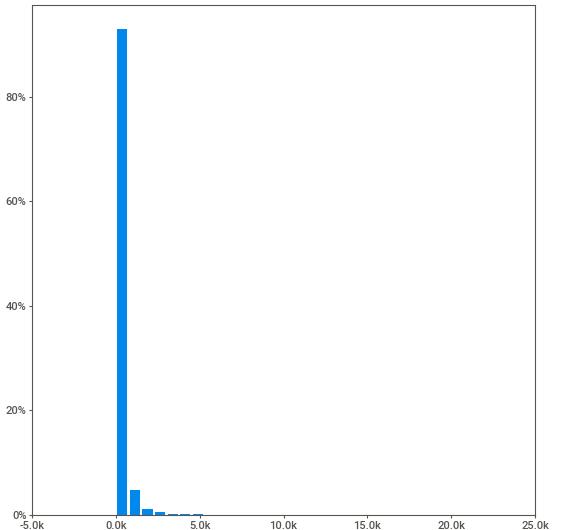
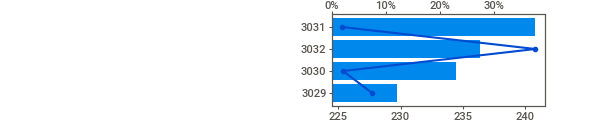
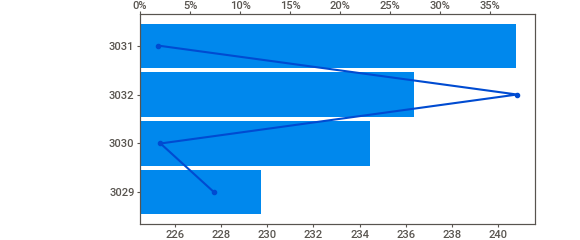
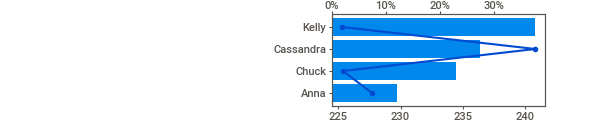
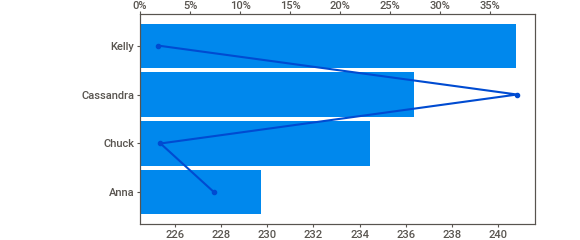
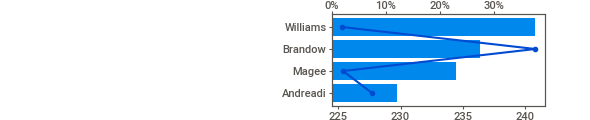
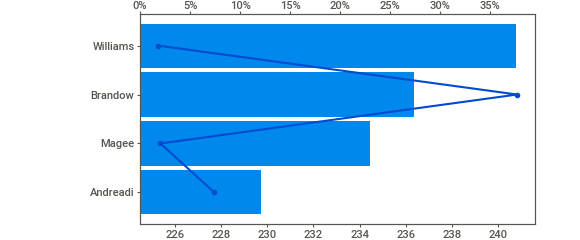
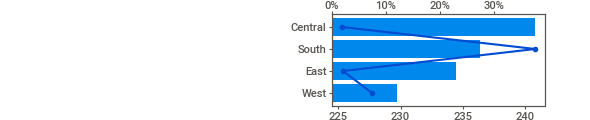
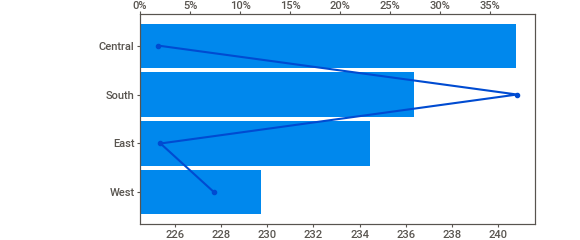
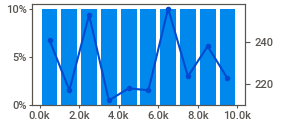
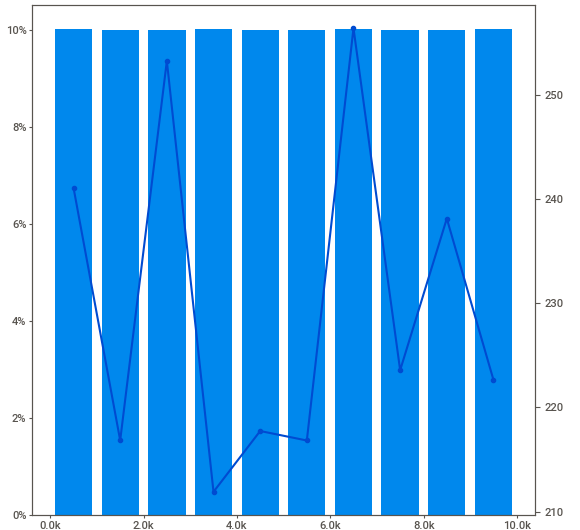
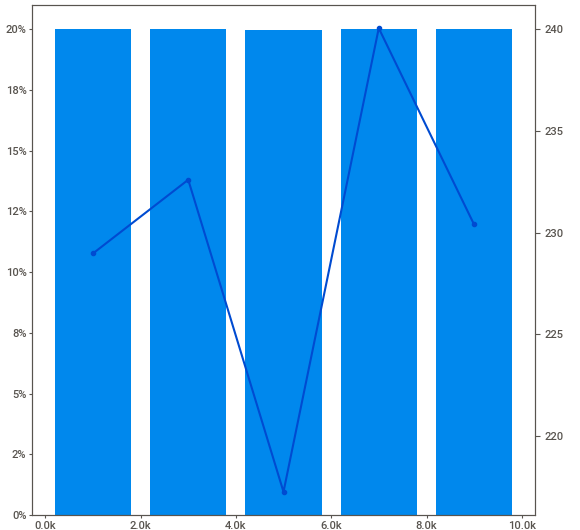
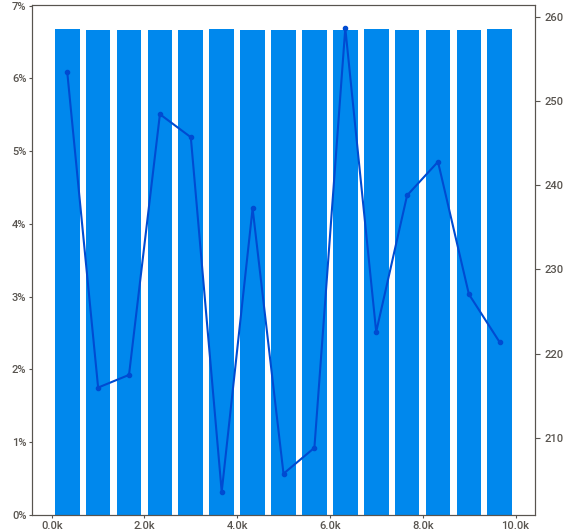
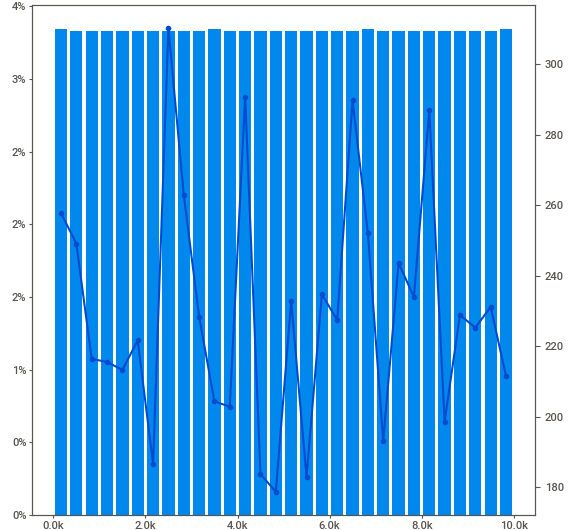
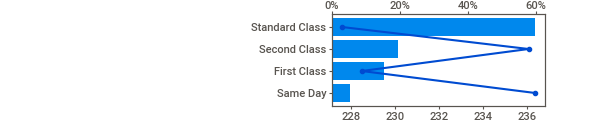
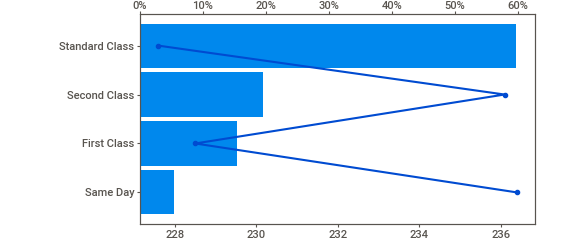
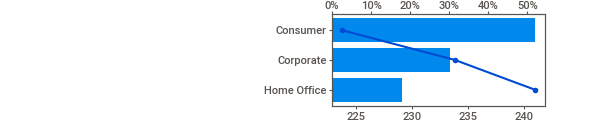
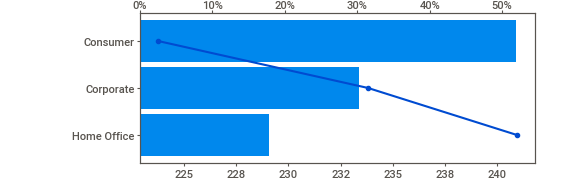
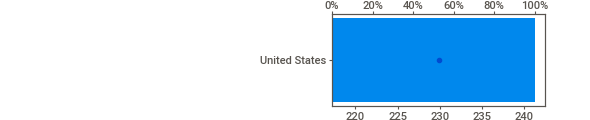
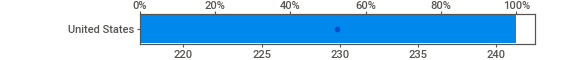
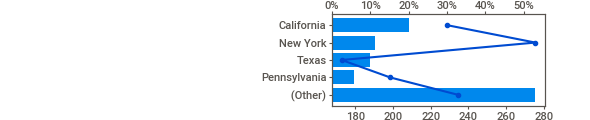
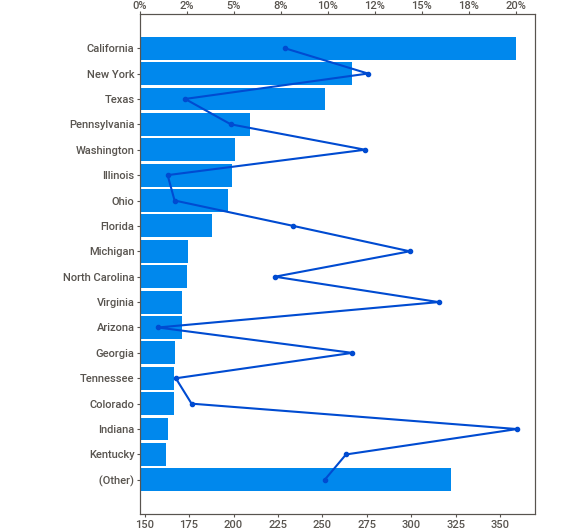
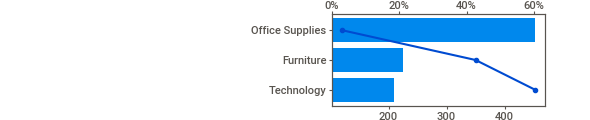
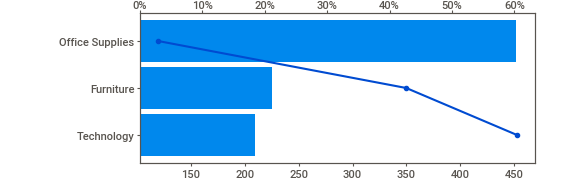
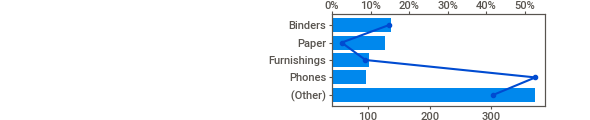
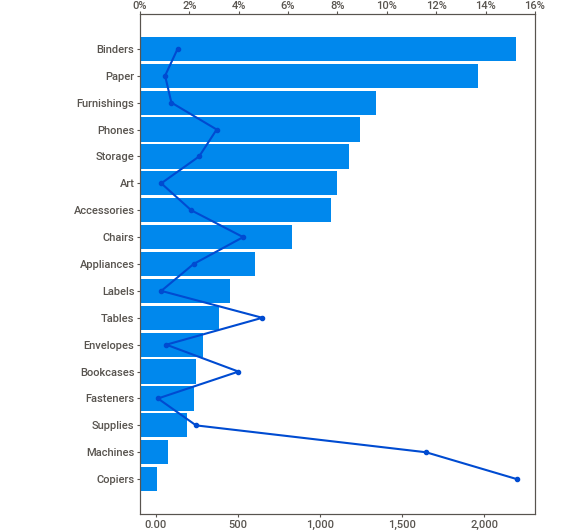
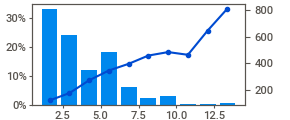
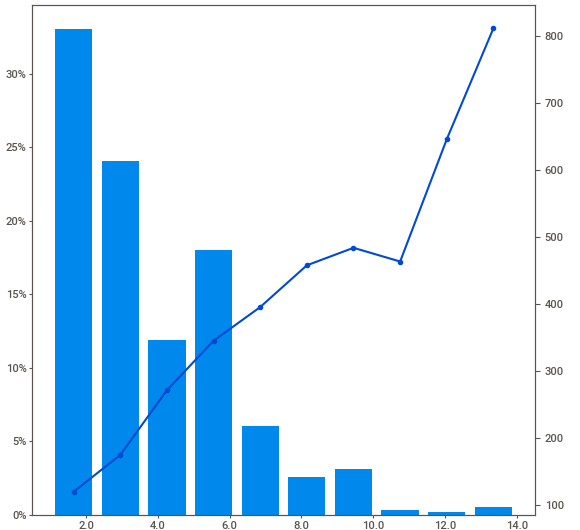
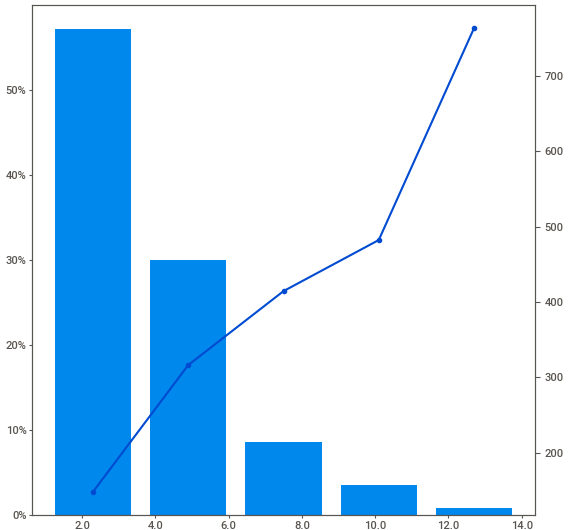
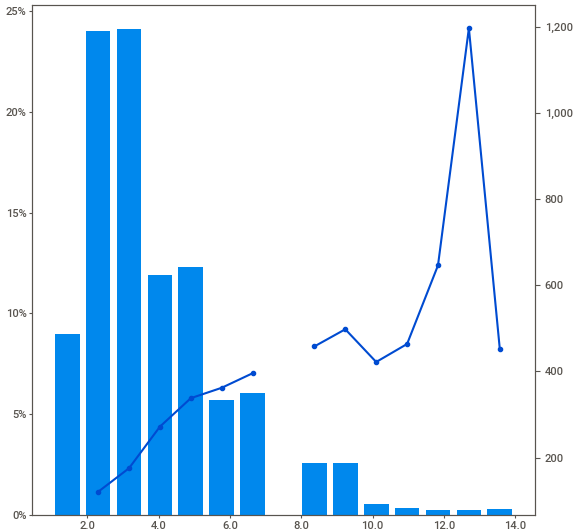
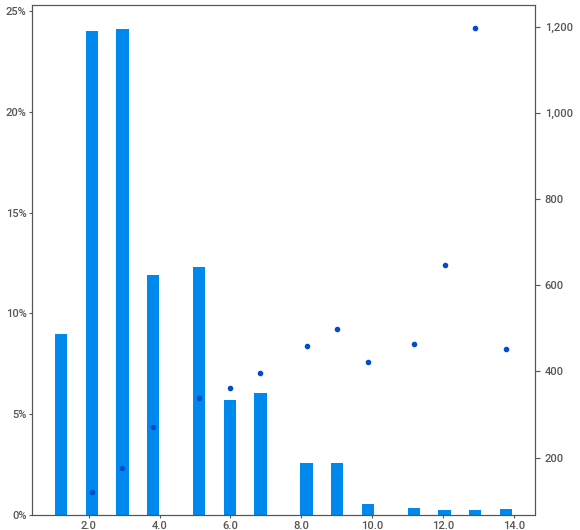
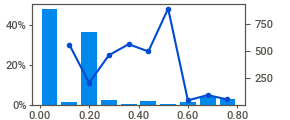
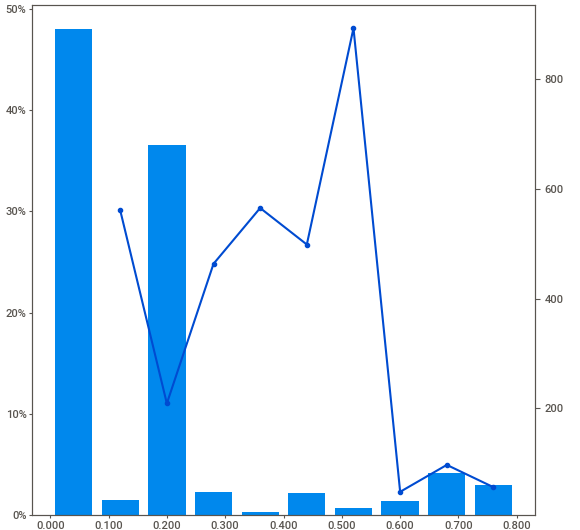
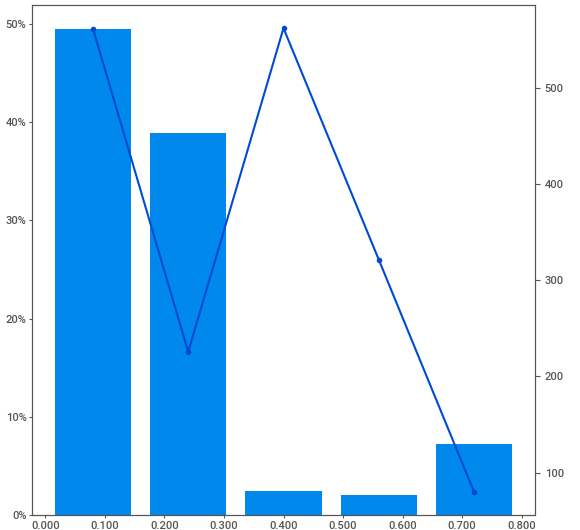
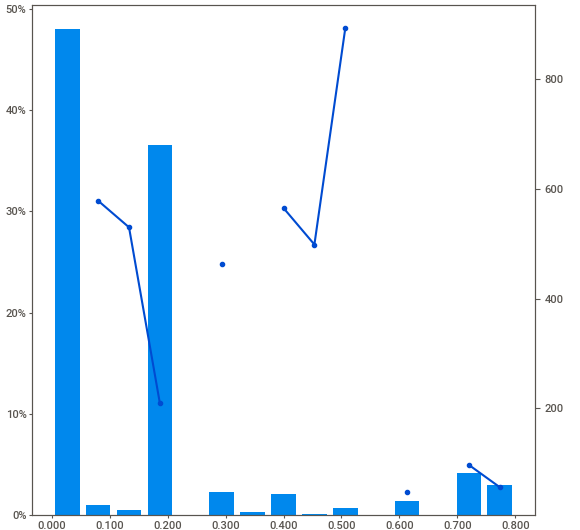
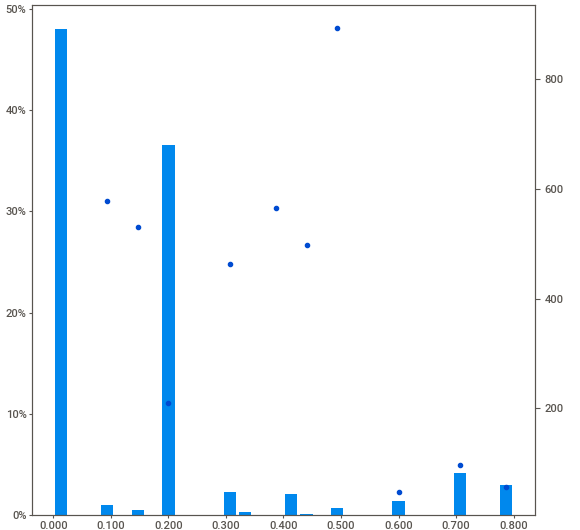
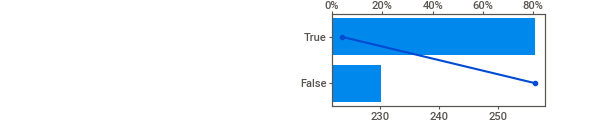
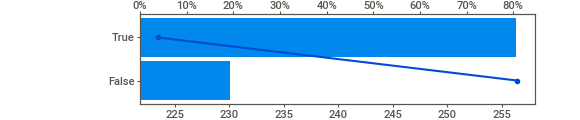
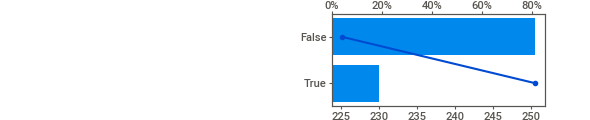
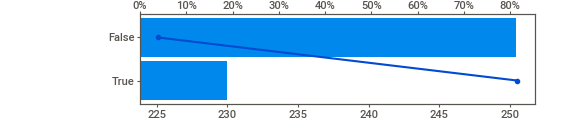
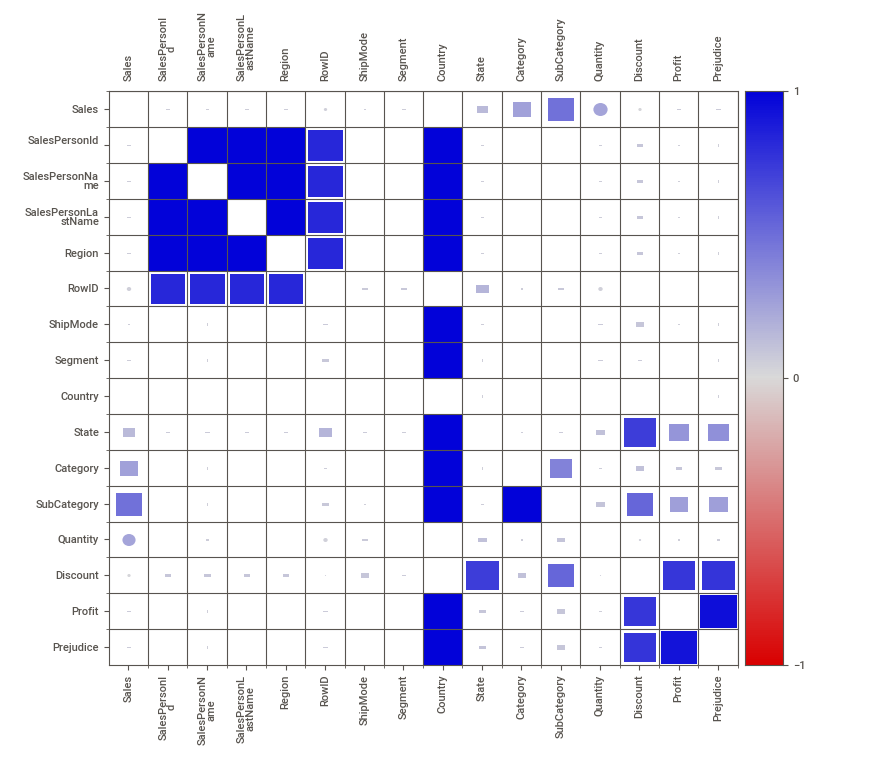
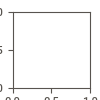

In [22]:
# show html report
    sales.show_notebook(layout='vertical', w=1000, h=800, scale=0.9)